In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

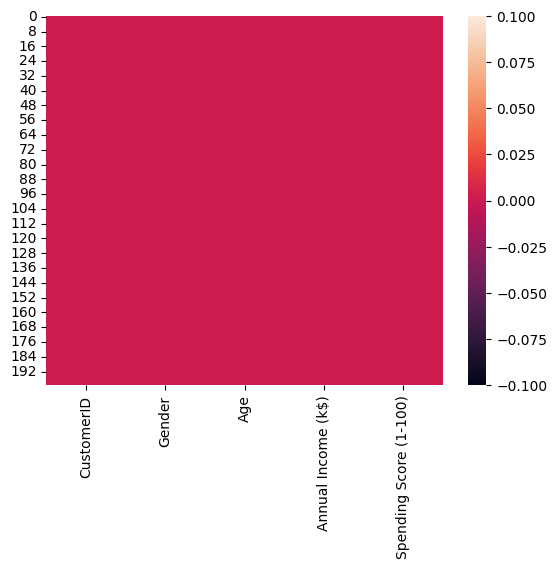

In [6]:
sns.heatmap(data.isna());

C:\Users\user\AppData\Local\Temp\ipykernel_1596\1431608771.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Gender',data=data,color='red',palette='mako')


<Axes: xlabel='count', ylabel='Gender'>

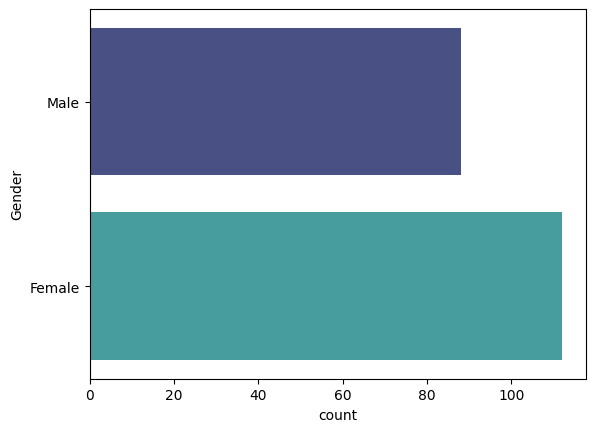

In [7]:

sns.countplot(y='Gender',data=data,color='red',palette='mako')

<Figure size 2000x1200 with 0 Axes>

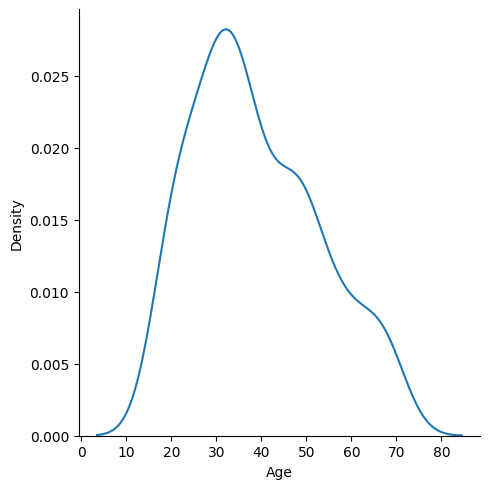

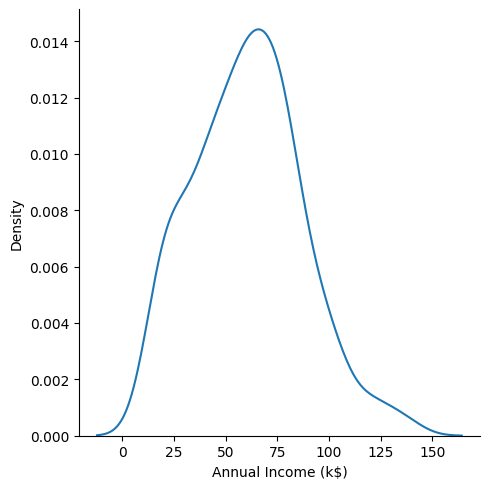

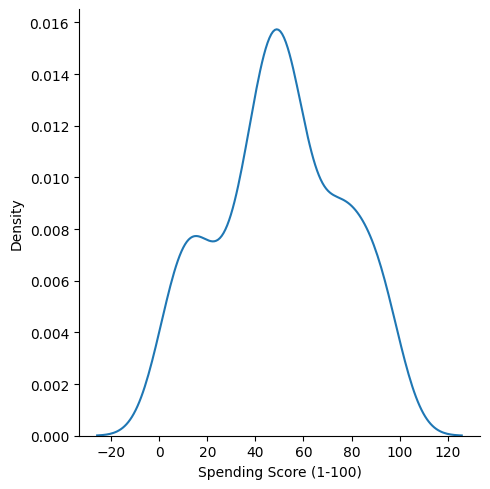

In [8]:

plt.figure(figsize=(20,12))
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    sns.displot(x=data[i],kind='kde')


<Axes: xlabel='Age', ylabel='Gender'>

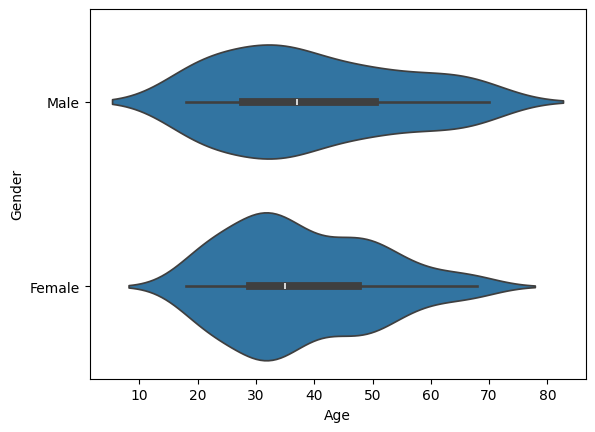

In [9]:
sns.violinplot(x=data['Age'],y=data['Gender'])

<Axes: xlabel='Annual Income (k$)', ylabel='Gender'>

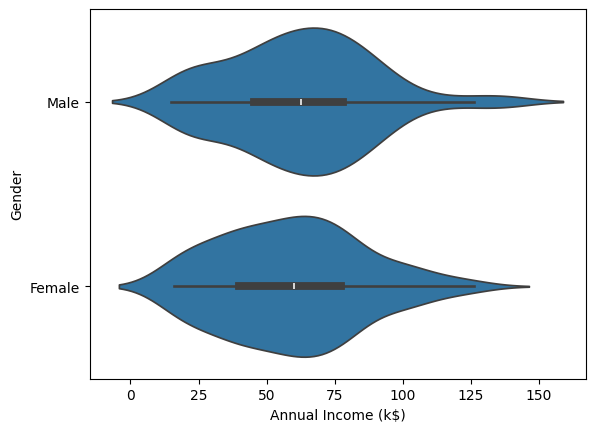

In [10]:
sns.violinplot(x=data['Annual Income (k$)'],y=data['Gender'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Gender'>

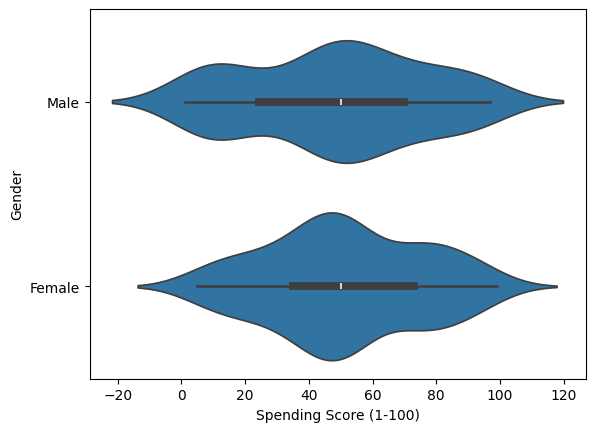

In [11]:
sns.violinplot(x=data['Spending Score (1-100)'],y=data['Gender'])

C:\Users\user\AppData\Local\Temp\ipykernel_1596\3017224962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex,y=agey,palette='mako')


<Axes: >

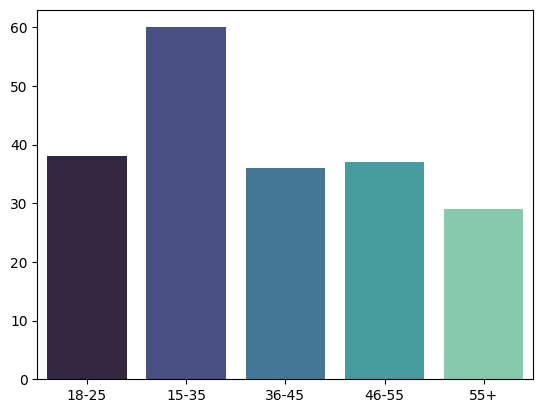

In [12]:
age_18_to_25=data.Age[(data['Age']>=18) & (data['Age']<=25)]
age_26_to_35=data.Age[(data['Age']>=26) & (data['Age']<=35)]
age_36_to_45=data.Age[(data['Age']>=36) & (data['Age']<=45)]
age_46_to_55=data.Age[(data['Age']>=46) & (data['Age']<=55)]
age_56_to_70=data.Age[data['Age']>=56 ]

agex=['18-25','15-35','36-45','46-55','55+']
agey=[len(age_18_to_25.values),len(age_26_to_35.values),len(age_36_to_45.values),len(age_46_to_55.values),len(age_56_to_70.values)]

sns.barplot(x=agex,y=agey,palette='mako')


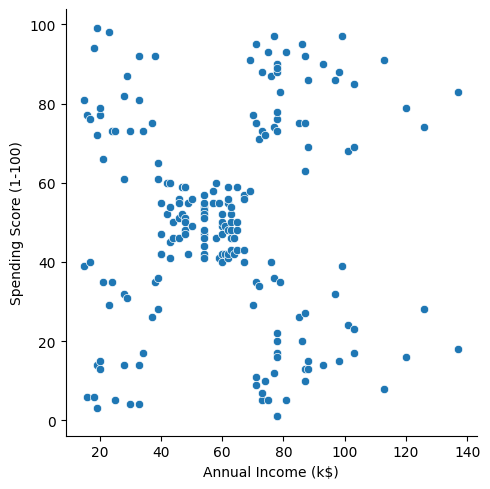

In [13]:
sns.relplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)']);

C:\Users\user\AppData\Local\Temp\ipykernel_1596\979714019.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex,y=agey,palette='Spectral')


Text(0, 0.5, 'Number of customers having score')

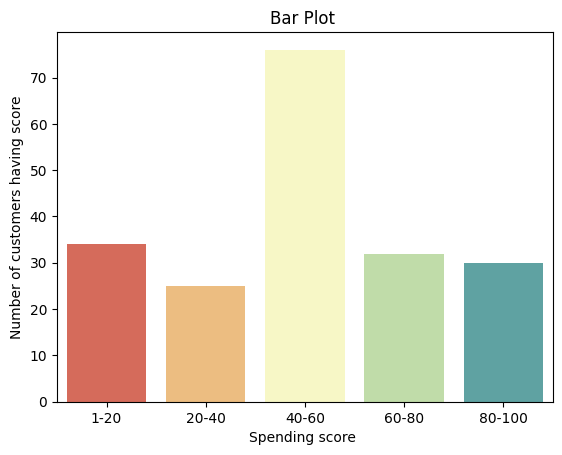

In [14]:
spending_score_1_to_20=data.Age[(data['Spending Score (1-100)']>=1) & (data['Spending Score (1-100)']<20)]
spending_score_20_to_40=data.Age[(data['Spending Score (1-100)']>=20) & (data['Spending Score (1-100)']<40)]
spending_score_40_to_60=data.Age[(data['Spending Score (1-100)']>=40) & (data['Spending Score (1-100)']<60)]
spending_score_60_to_80=data.Age[(data['Spending Score (1-100)']>60) & (data['Spending Score (1-100)']<80)]
spending_score_80_to_100=data.Age[(data['Spending Score (1-100)']>80) & (data['Spending Score (1-100)']<100)]

agex=['1-20','20-40','40-60','60-80','80-100']
agey=[len(spending_score_1_to_20.values),len(spending_score_20_to_40.values),len(spending_score_40_to_60.values),len(spending_score_60_to_80.values),len(spending_score_80_to_100.values)]

sns.barplot(x=agex,y=agey,palette='Spectral')
plt.title('Bar Plot ')
plt.xlabel('Spending score ')
plt.ylabel('Number of customers having score')

C:\Users\user\AppData\Local\Temp\ipykernel_1596\2924204916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex,y=agey,palette='rocket')


Text(0, 0.5, 'Number of customers having Annual Income')

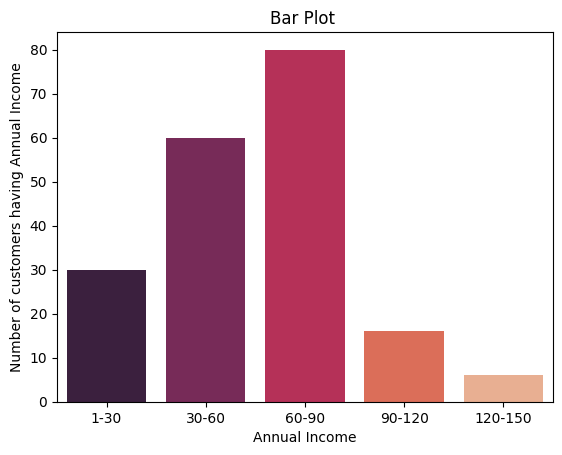

In [15]:
income_1_to_30=data.Age[(data['Annual Income (k$)']>=1) & (data['Annual Income (k$)']<30)]
income_30_to_60=data.Age[(data['Annual Income (k$)']>30) & (data['Annual Income (k$)']<60)]
income_60_to_90=data.Age[(data['Annual Income (k$)']>60) & (data['Annual Income (k$)']<90)]
income_90_to_120=data.Age[(data['Annual Income (k$)']>=90) & (data['Annual Income (k$)']<120)]
income_120_to_150=data.Age[(data['Annual Income (k$)']>=120) & (data['Annual Income (k$)']<150)]


agex=['1-30','30-60','60-90','90-120','120-150']
agey=[len(income_1_to_30.values),len(income_30_to_60.values),len(income_60_to_90.values),len(income_90_to_120.values),len(income_120_to_150.values)]

sns.barplot(x=agex,y=agey,palette='rocket')
plt.title('Bar Plot ')
plt.xlabel('Annual Income')
plt.ylabel('Number of customers having Annual Income')

## 2 D CLUSTERING 

In [16]:
# now making 2 D clustring 
x1=data.loc[:,['Age','Spending Score (1-100)']]

wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(x1)
    wcss.append(model.inertia_)
wcss    


[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23951.044340905453,
 20015.97945860015,
 18257.478685045746,
 13855.829804868808,
 13216.221407166293,
 10808.438587626972]

Text(0, 0.5, 'WCSS Values')

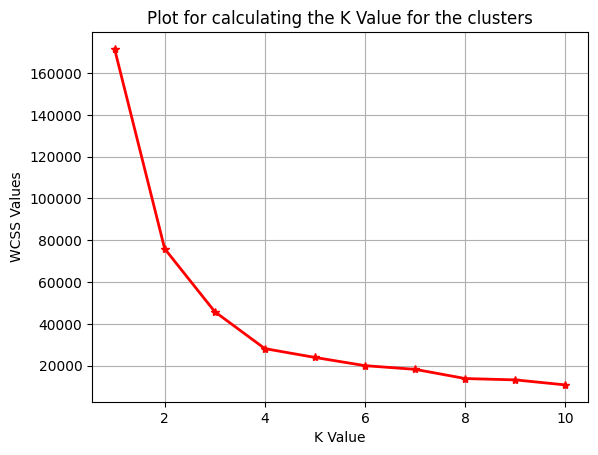

In [17]:
plt.grid()
plt.plot(range(1,11),wcss,color='r',linewidth=2,marker='*')
plt.title('Plot for calculating the K Value for the clusters')
plt.xlabel('K Value')
plt.ylabel('WCSS Values')


In [18]:
model=KMeans(n_clusters=4,init='k-means++',random_state=42)
labels=model.fit_predict(x1)

In [19]:
labels

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [20]:
model.cluster_centers_

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

Text(0, 0.5, 'Spending Score (1-100)')

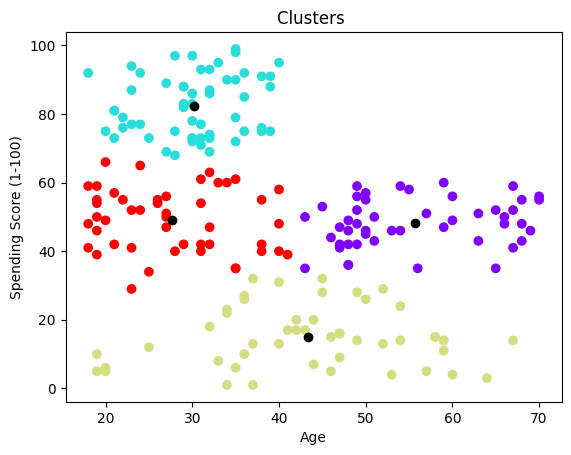

In [21]:
plt.scatter(x1['Age'],x1['Spending Score (1-100)'],c=model.labels_,cmap="rainbow")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color="black")
plt.title('Clusters ')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

In [22]:
x2=data[['Annual Income (k$)','Spending Score (1-100)']]

wcss=[]
for i in range(1,11):
    mode1=KMeans(n_clusters=i,init='k-means++',random_state=42)
    mode1.fit(x2)
    wcss.append(mode1.inertia_)
wcss

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518778,
 24766.471609793443,
 23103.122085983916]

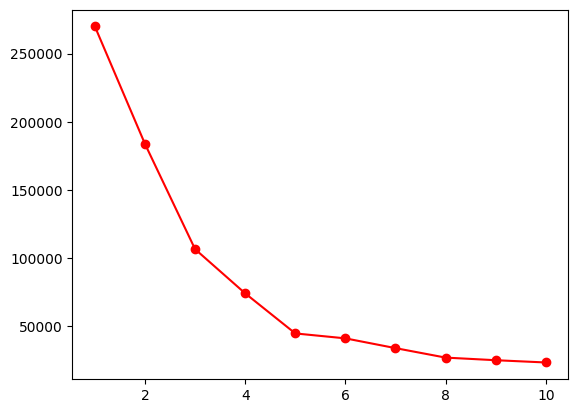

In [23]:
plt.plot(range(1,11),wcss,color='red',marker='o')

In [24]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [25]:
mode1=KMeans(n_clusters=5,init='k-means++',random_state=42)
labels1=mode1.fit_predict(x2)
labels1

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

Text(0, 0.5, 'Spending Score (1-100)')

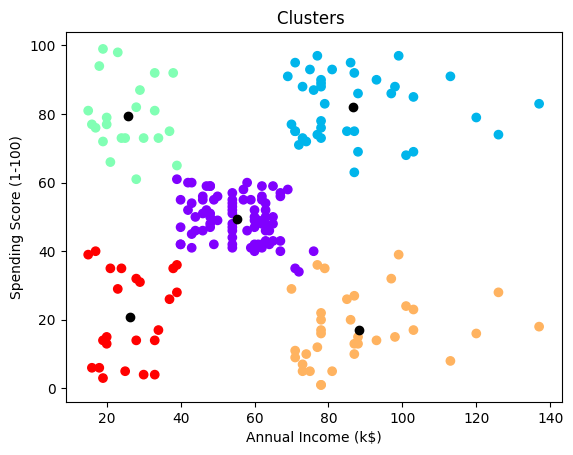

In [26]:
plt.scatter(x2['Annual Income (k$)'],x2['Spending Score (1-100)'],c=labels1,cmap='rainbow')
plt.scatter(mode1.cluster_centers_[:,0],mode1.cluster_centers_[:,1],color="black")
plt.title('Clusters ')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [27]:
mode1.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

## these were the 2 D clusering , Now we will use 3 D clustering 

## 3 D CLUSTERING

In [28]:
x3=data.iloc[:,2:]


wcss=[]
for i in range(1,11): 
    model2=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model2.fit(x3)
    wcss.append(model2.inertia_)
    
wcss    

[308812.78,
 221087.19627192977,
 158744.9710801394,
 104366.15145556198,
 97211.84353980479,
 68275.94428646986,
 51448.36126259324,
 44640.02804853041,
 42081.855308685306,
 38378.73890793208]

Text(0, 0.5, 'wcss')

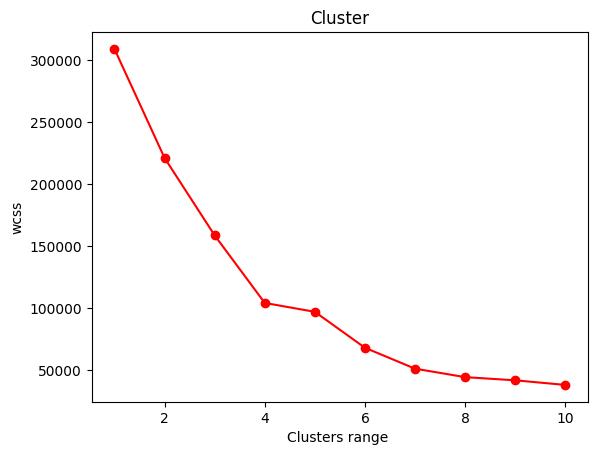

In [29]:
plt.plot(range(1,11),wcss,color='red',marker='o')
plt.title("Cluster")
plt.xlabel('Clusters range ')
plt.ylabel('wcss')

In [30]:
model2=KMeans(n_clusters=5,init='k-means++',random_state=42)
cluster=model2.fit_predict(x3)
data['labels']=cluster
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [31]:
model2.cluster_centers_

array([[ 46.21348315,  47.71910112,  41.79775281],
       [ 32.45454545, 108.18181818,  82.72727273],
       [ 24.68965517,  29.5862069 ,  73.65517241],
       [ 40.39473684,  87.        ,  18.63157895],
       [ 31.78787879,  76.09090909,  77.75757576]])

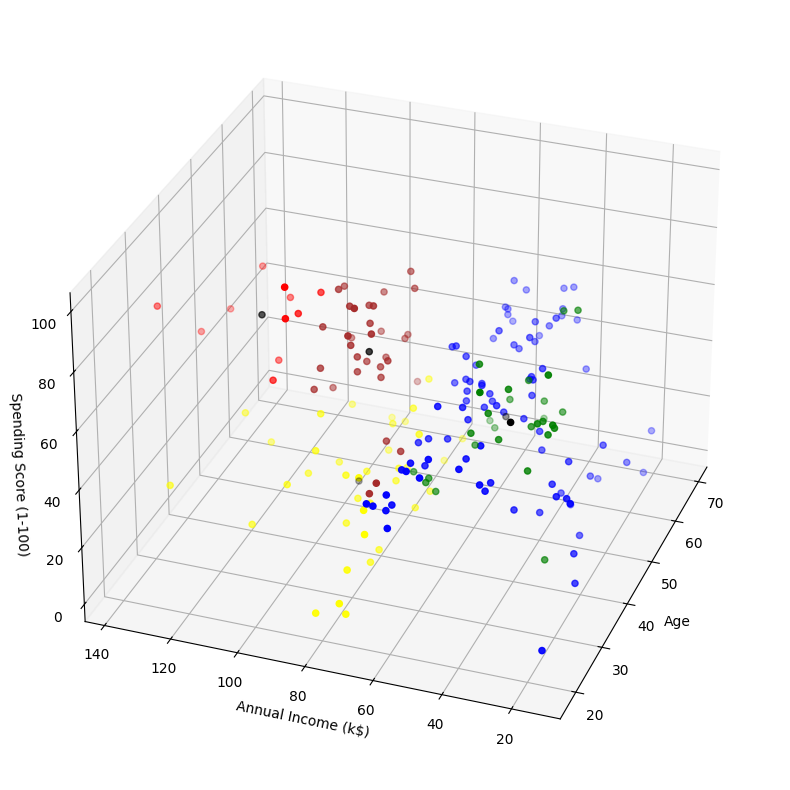

In [43]:
# Now we got the 3D data
fig=plt.figure(figsize=(20,10))
# this for creating 3d plane 
ax=fig.add_subplot(projection='3d')
ax.scatter(data['Age'][data['labels']==0],data['Annual Income (k$)'][data['labels']==0],data['Spending Score (1-100)'][data['labels']==0],color='blue')
ax.scatter(data['Age'][data['labels']==1],data['Annual Income (k$)'][data['labels']==1],data['Spending Score (1-100)'][data['labels']==1],color='red')
ax.scatter(data['Age'][data['labels']==2],data['Annual Income (k$)'][data['labels']==2],data['Spending Score (1-100)'][data['labels']==2],color='green')
ax.scatter(data['Age'][data['labels']==3],data['Annual Income (k$)'][data['labels']==3],data['Spending Score (1-100)'][data['labels']==3],color='yellow')
ax.scatter(data['Age'][data['labels']==4],data['Annual Income (k$)'][data['labels']==4],data['Spending Score (1-100)'][data['labels']==4],color='brown')
ax.scatter(model2.cluster_centers_[:,0],model2.cluster_centers_[:,1],model2.cluster_centers_[:,2],color='black')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.view_init(30,200)